## Цель лабораторной работы

Изучить и посмотреть разнообразные подходы к визуализации данных

## Задание

Требуется выполнить следующие действия:
- Выбрать набор данных (датасет).
- Создать ноутбук, который содержит следующие разделы:
 1. Текстовое описание выбранного набора данных.
 2. Основные характеристики датасета.
 3. Визуальное исследование датасета.
 4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на GitHub.

## Ход выполнения работы

### Текстовое описание набора данных

В датасете представлены еженедельные данные сканирования розничной торговли c 2015 по 2021 год для национального объема розничной торговли (единицы измерения) и цены. Данные сканирования розничной торговли поступали непосредственно с кассовых аппаратов розничных торговцев, основанные на фактических розничных продажах авокадо сорта Хасс. Включает в себя агрегацию следующих каналов: продуктовые, масс-маркеты, клубы, аптеки и военторги. Средняя цена авокадо в таблице отражает стоимость за единицу, даже если несколько единиц продаются в фасоновых мешках. Коды поиска продуктов (PLU) в таблице предназначены только для авокадо Хасс. Другие сорта авокадо (например, зеленокожие) в этот датасет не включены.

- Date - дата наблюдения;
- average_price - средняя цена одного авокадо;
- type - обычный или органический;
- year - год;
- Region - город или регион наблюдения;
- Total Volume - общее количество проданных авокадо;
- 4046 - общее количество проданных авокадо с кодом PLU 4046 (маленькие);
- 4225 - общее количество проданных авокадо с кодом PLU 4225 (средние);
- 4770 - общее количество проданных авокадо с кодом PLU 4770 (большие);
- total_bags - объем продаж авокадо в упаковках;
- small_bags - объем продаж авокадо в маленьких упаковках;
- large_bags - объем продаж авокадо в больших упаковках;
- xlarge_bags - объем продаж авокадо в очень больших упаковках;
- type - тип авокадо;
- year - год;
- geography - регион продажи.

## Основные характеристки набора данных

In [1]:
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Определение ширины графика для формата А4

In [3]:
pd.set_option("display.width", 70)

In [4]:
df = pd.read_csv("avocado-updated-2020.csv")

In [5]:
df.rename(columns={"Unnamed: 0" : "id"}, inplace=True)

In [6]:
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [7]:
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [8]:
df.shape

(33045, 13)

In [9]:
df.describe()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,33045.000000,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,3.304500e+04,33045.000000
mean,1.379941,9.683997e+05,3.023914e+05,2.797693e+05,2.148255e+04,3.646735e+05,2.501980e+05,1.067329e+05,7.742585e+03,2017.460887
std,0.378972,3.934533e+06,1.301026e+06,1.151052e+06,1.001607e+05,1.564004e+06,1.037734e+06,5.167226e+05,4.819803e+04,1.699747
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000
25%,1.100000,1.511895e+04,7.673100e+02,2.712470e+03,0.000000e+00,9.121860e+03,6.478630e+03,4.662900e+02,0.000000e+00,2016.000000
50%,1.350000,1.291170e+05,1.099477e+04,2.343600e+04,1.780900e+02,5.322224e+04,3.687699e+04,6.375860e+03,0.000000e+00,2017.000000
75%,1.620000,5.058285e+05,1.190219e+05,1.352389e+05,5.096530e+03,1.744314e+05,1.206624e+05,4.041723e+04,8.044400e+02,2019.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.403184e+06,2020.000000


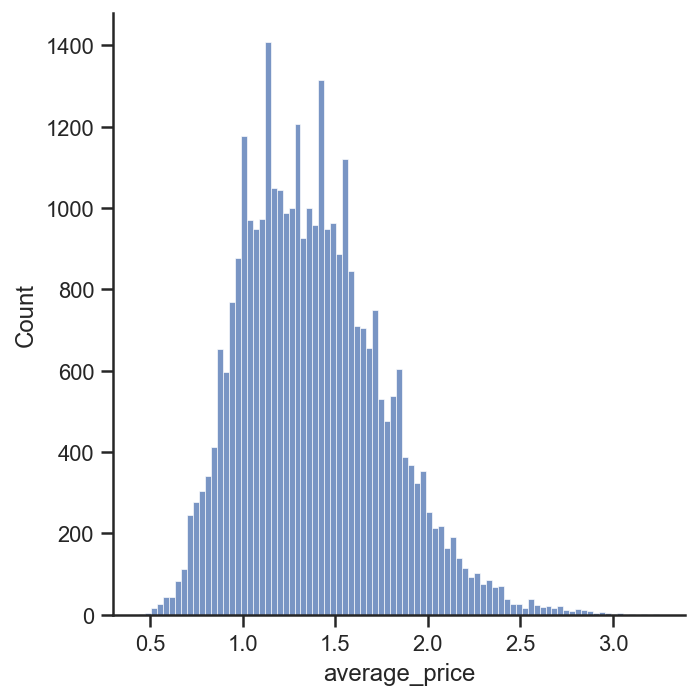

In [11]:
sns.displot(df["average_price"])

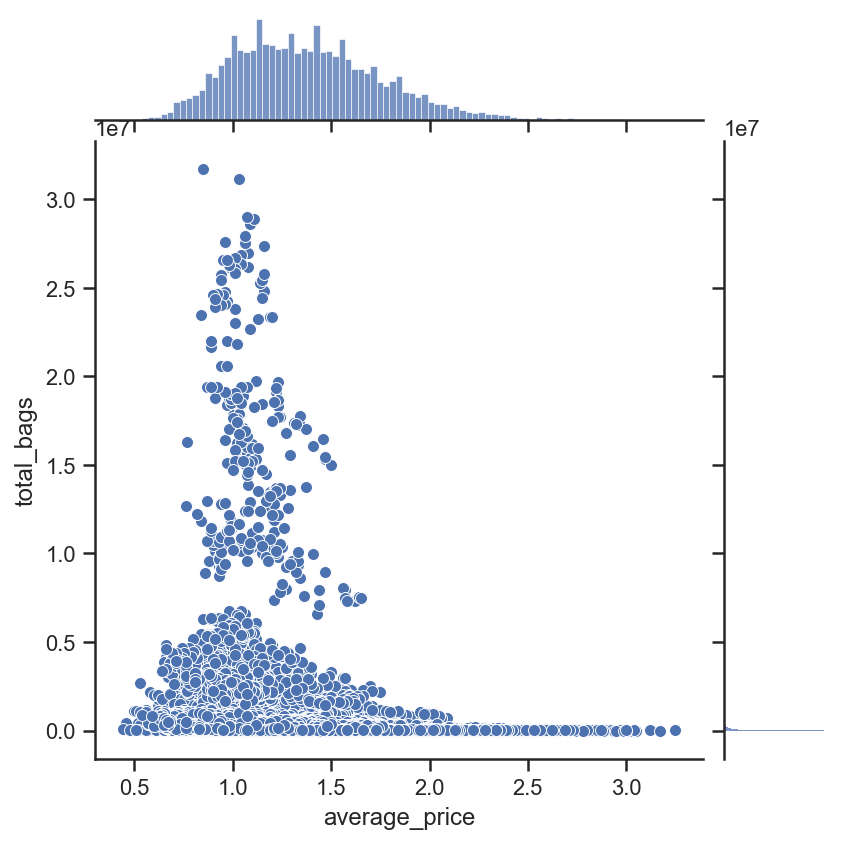

In [12]:
sns.jointplot(x="average_price", y="total_bags", data=df)

/Users/simple/labs/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


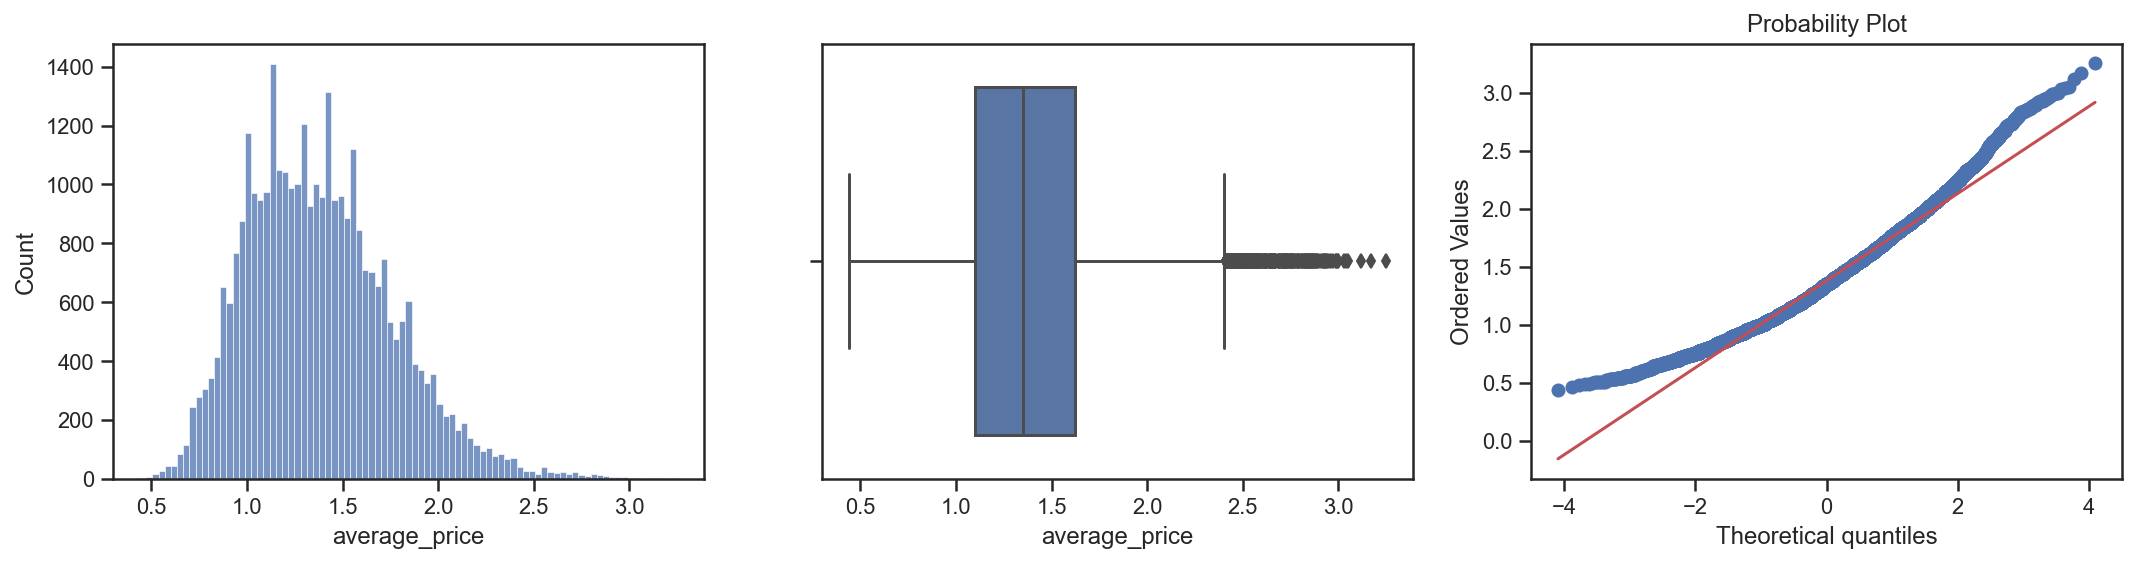

In [29]:

f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
sns.histplot(df.average_price, ax=ax[0])
sns.boxplot(df.average_price, ax=ax[1])
from scipy import stats
stats.probplot(df['average_price'], plot=ax[2])
plt.show()

In [16]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

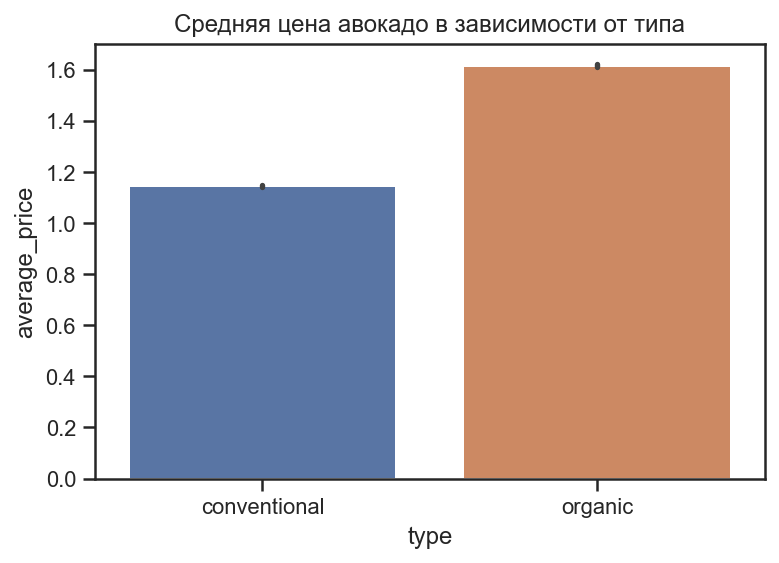

In [17]:
plt.figure()
plt.title("Средняя цена авокадо в зависимости от типа")
sns.barplot(x="type",y="average_price",data= df)
plt.show()

In [18]:
conventional = len(df[df['type'] == 'conventional'])
conventional

16524

In [19]:
organic = len(df[df['type']== 'organic'])
organic

16521

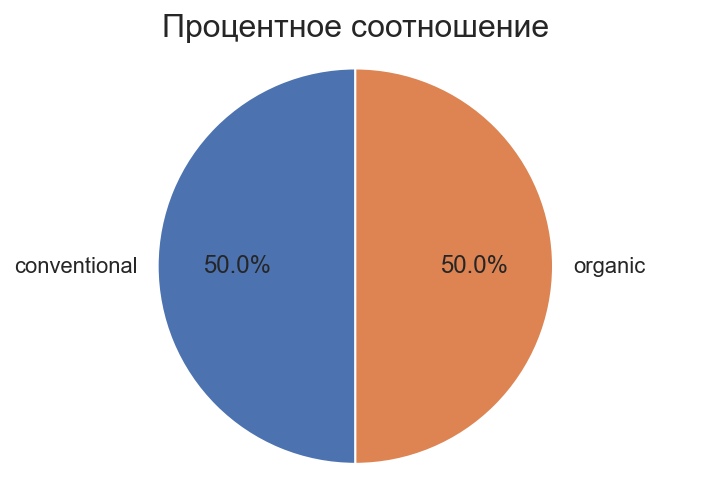

In [21]:
y = ('conventional', 'organic')
y_pos = np.arange(len(y))
x = (conventional, organic)
labels = 'conventional', 'organic'
sizes = [conventional, organic]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Процентное соотношение', size=16)
plt.show()

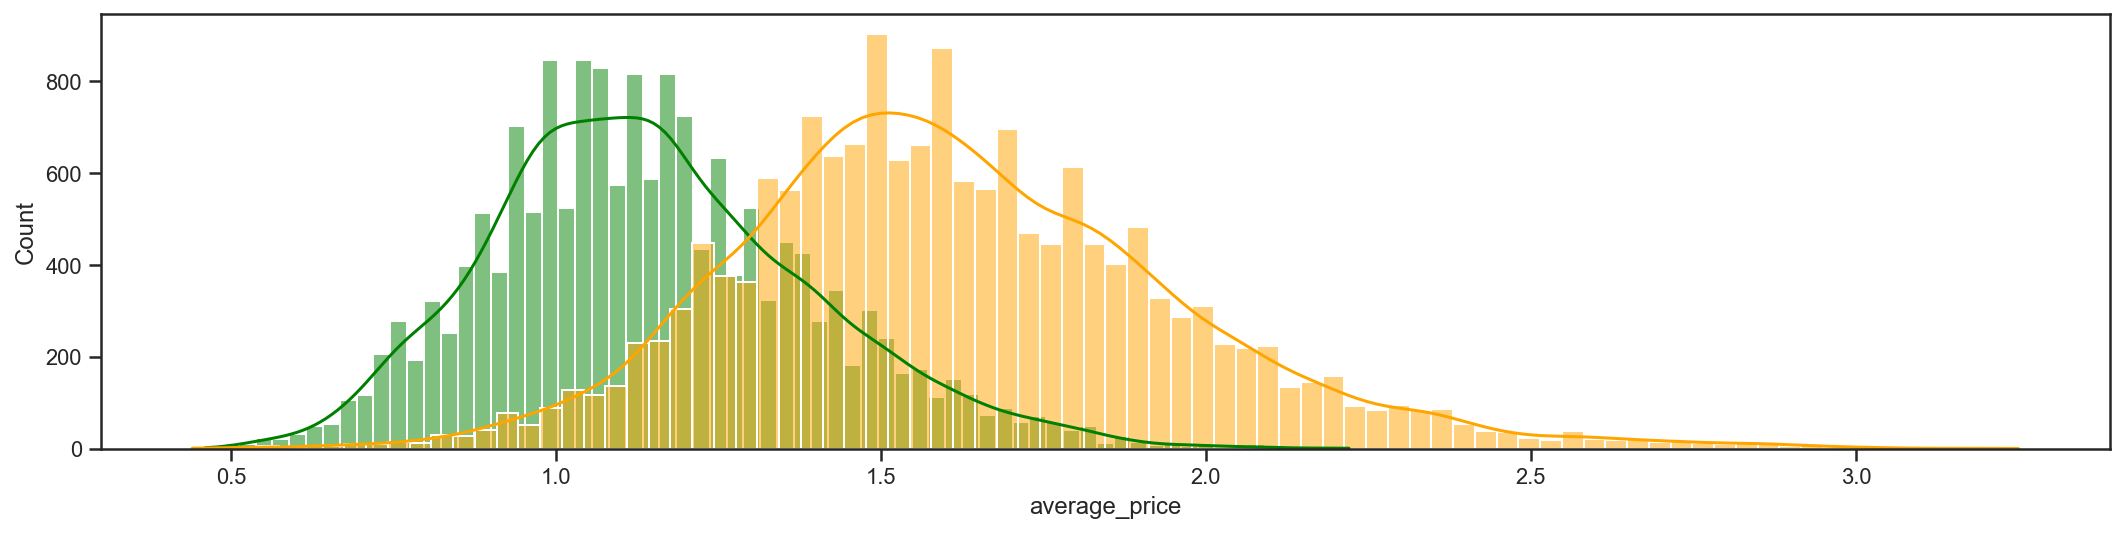

In [22]:
df_conventional = df[df['type'] == 'conventional']

df_organic = df[df['type'] == 'organic']

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.histplot(df_conventional['average_price'], kde=True, color="green") # histogram
sns.histplot(df_organic['average_price'], kde=True, color="orange") # histogram
plt.show()

/Users/simple/labs/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/simple/labs/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


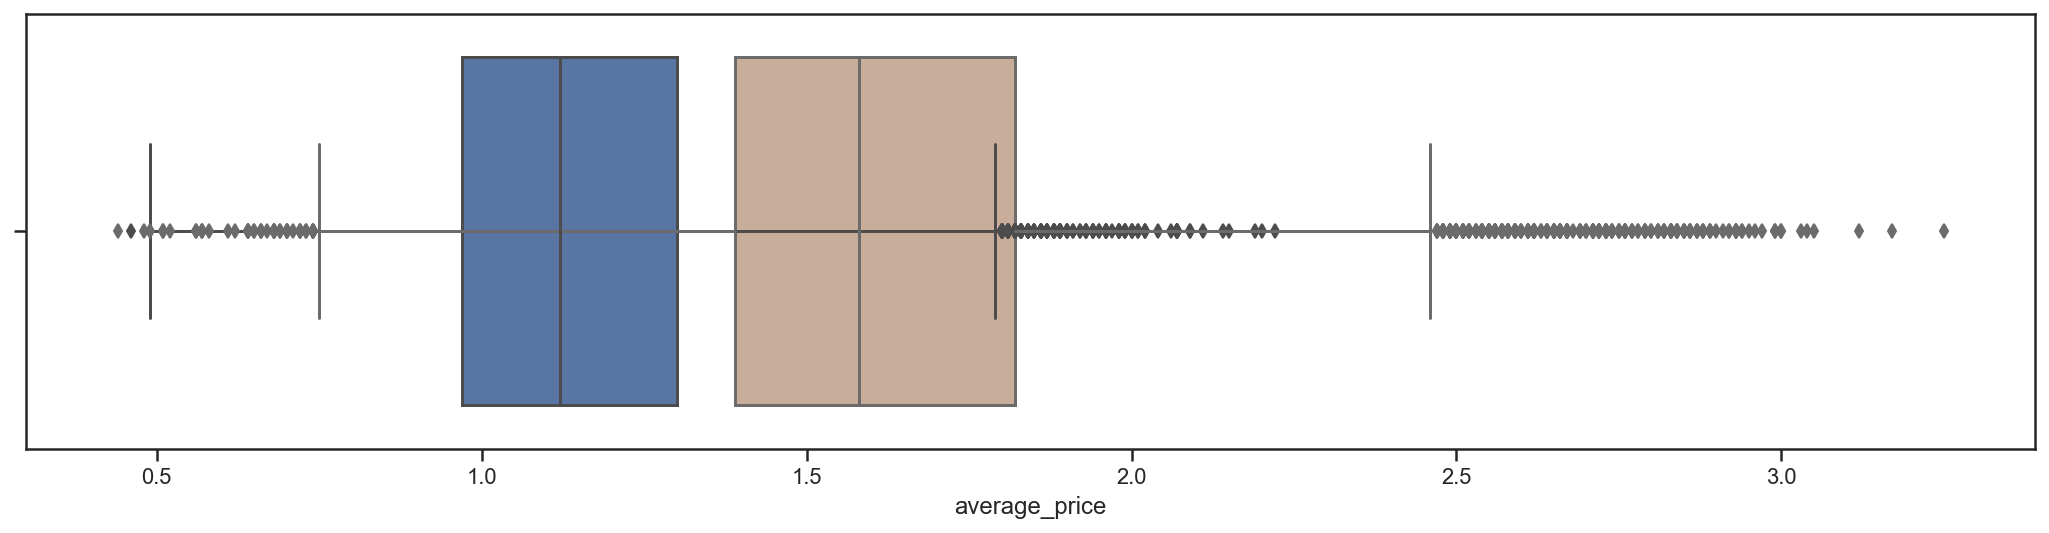

In [23]:
df_conventional = df[df['type'] == 'conventional']
# df_conventional.shape
df_organic = df[df['type'] == 'organic']
# df_organic.shape
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.boxplot(df_conventional['average_price']) # histogram
sns.boxplot(df_organic['average_price'],palette = 'pink') # histogram
plt.show()

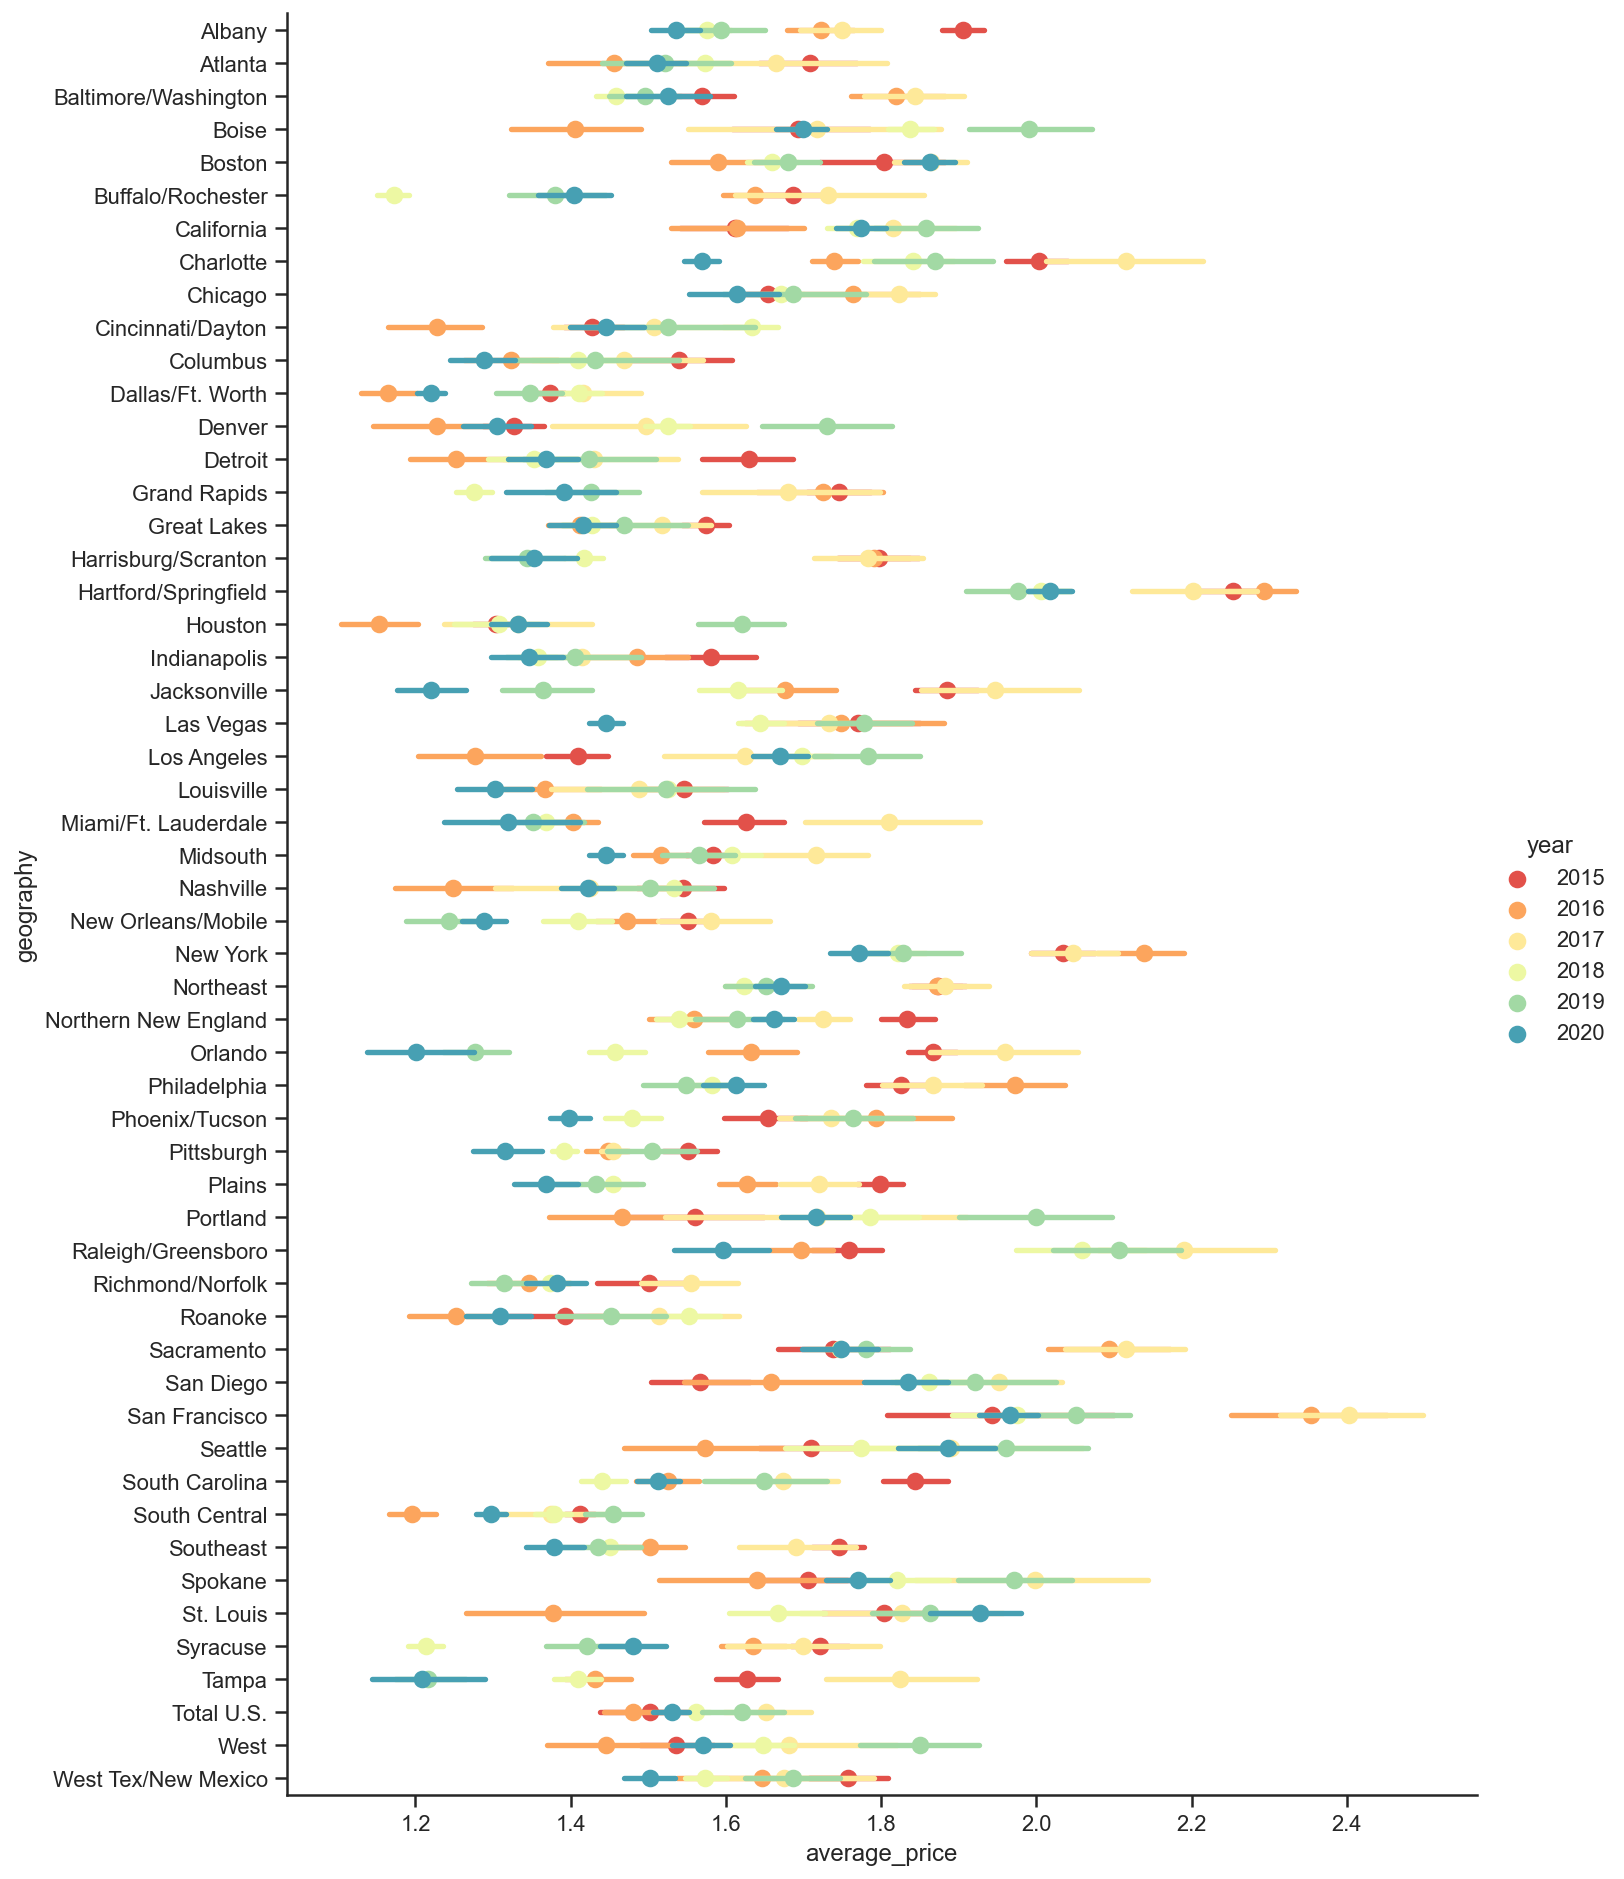

In [25]:
mask = df['type']=='organic'
g = sns.factorplot('average_price','geography',data=df[mask],
    hue='year',height=13,aspect=0.8,palette='Spectral',join=False,)

<AxesSubplot:title={'center':'Корреляционная матрица'}>

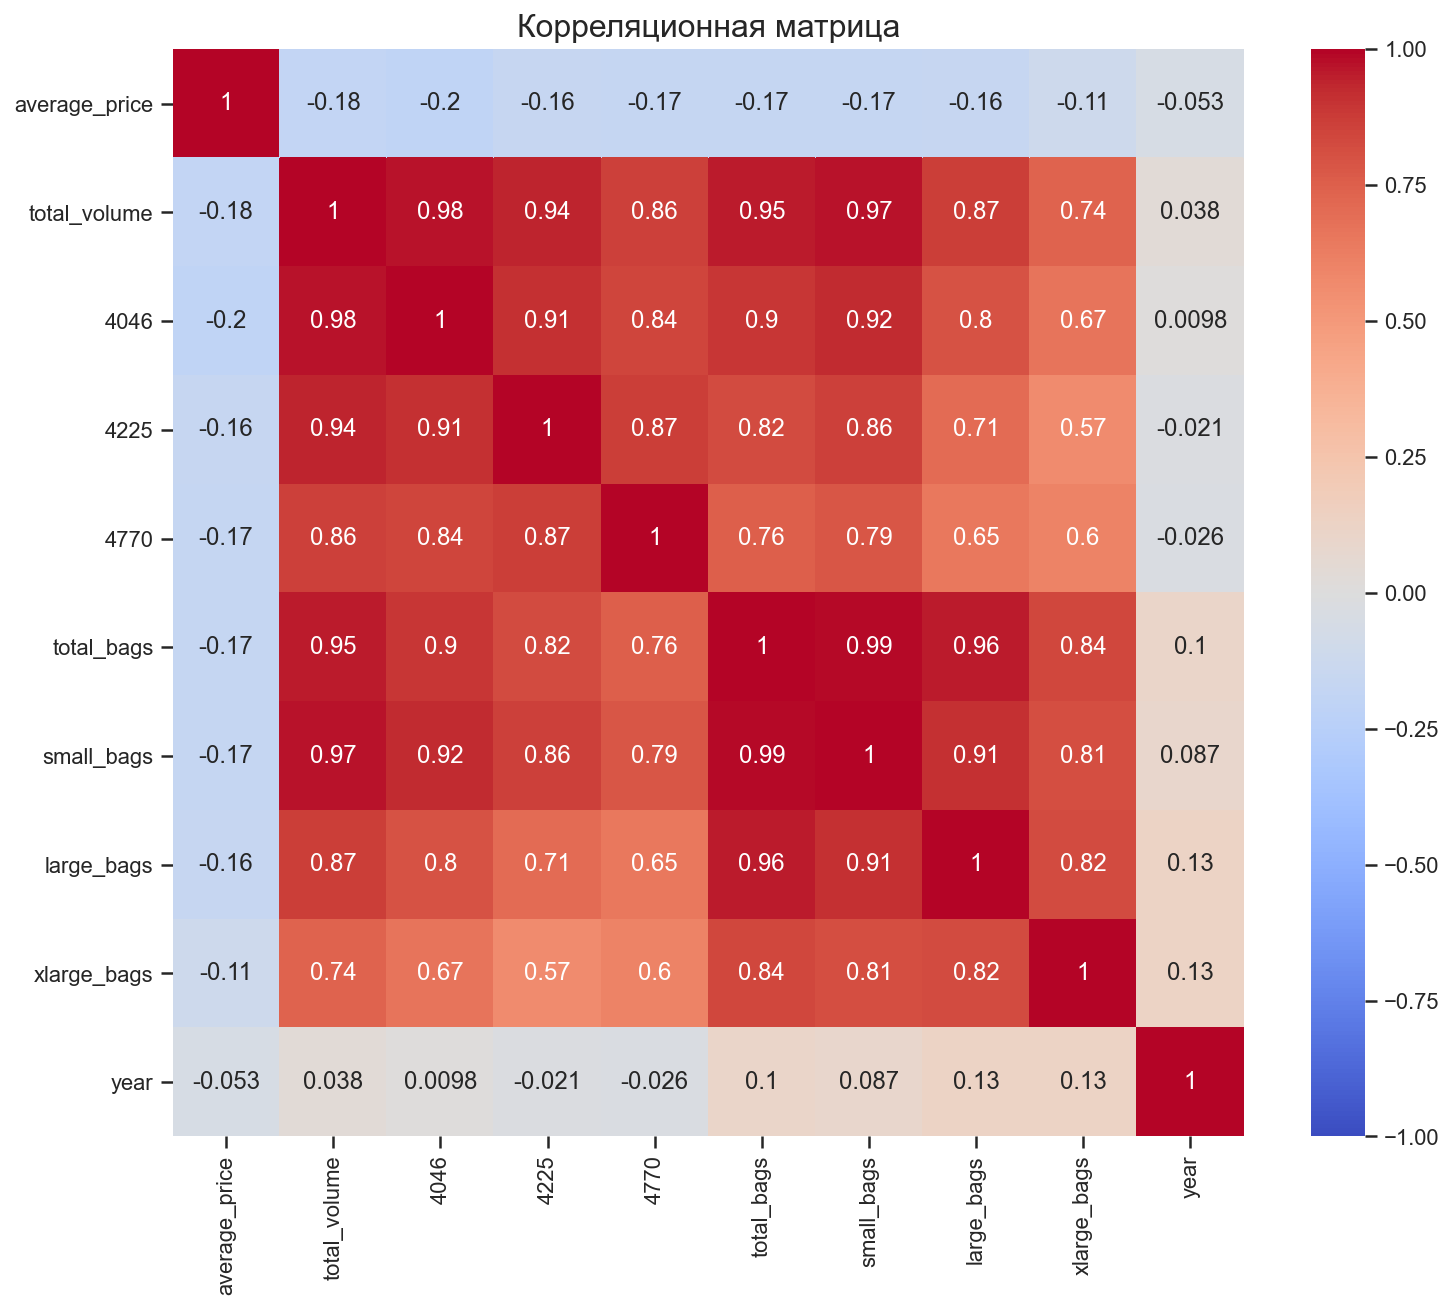

In [26]:
corrmat = df.corr()
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
ax.set_title("Корреляционная матрица", fontsize=16)
filter = df.columns != 'id'
sns.heatmap(df[df.columns[filter]].corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)

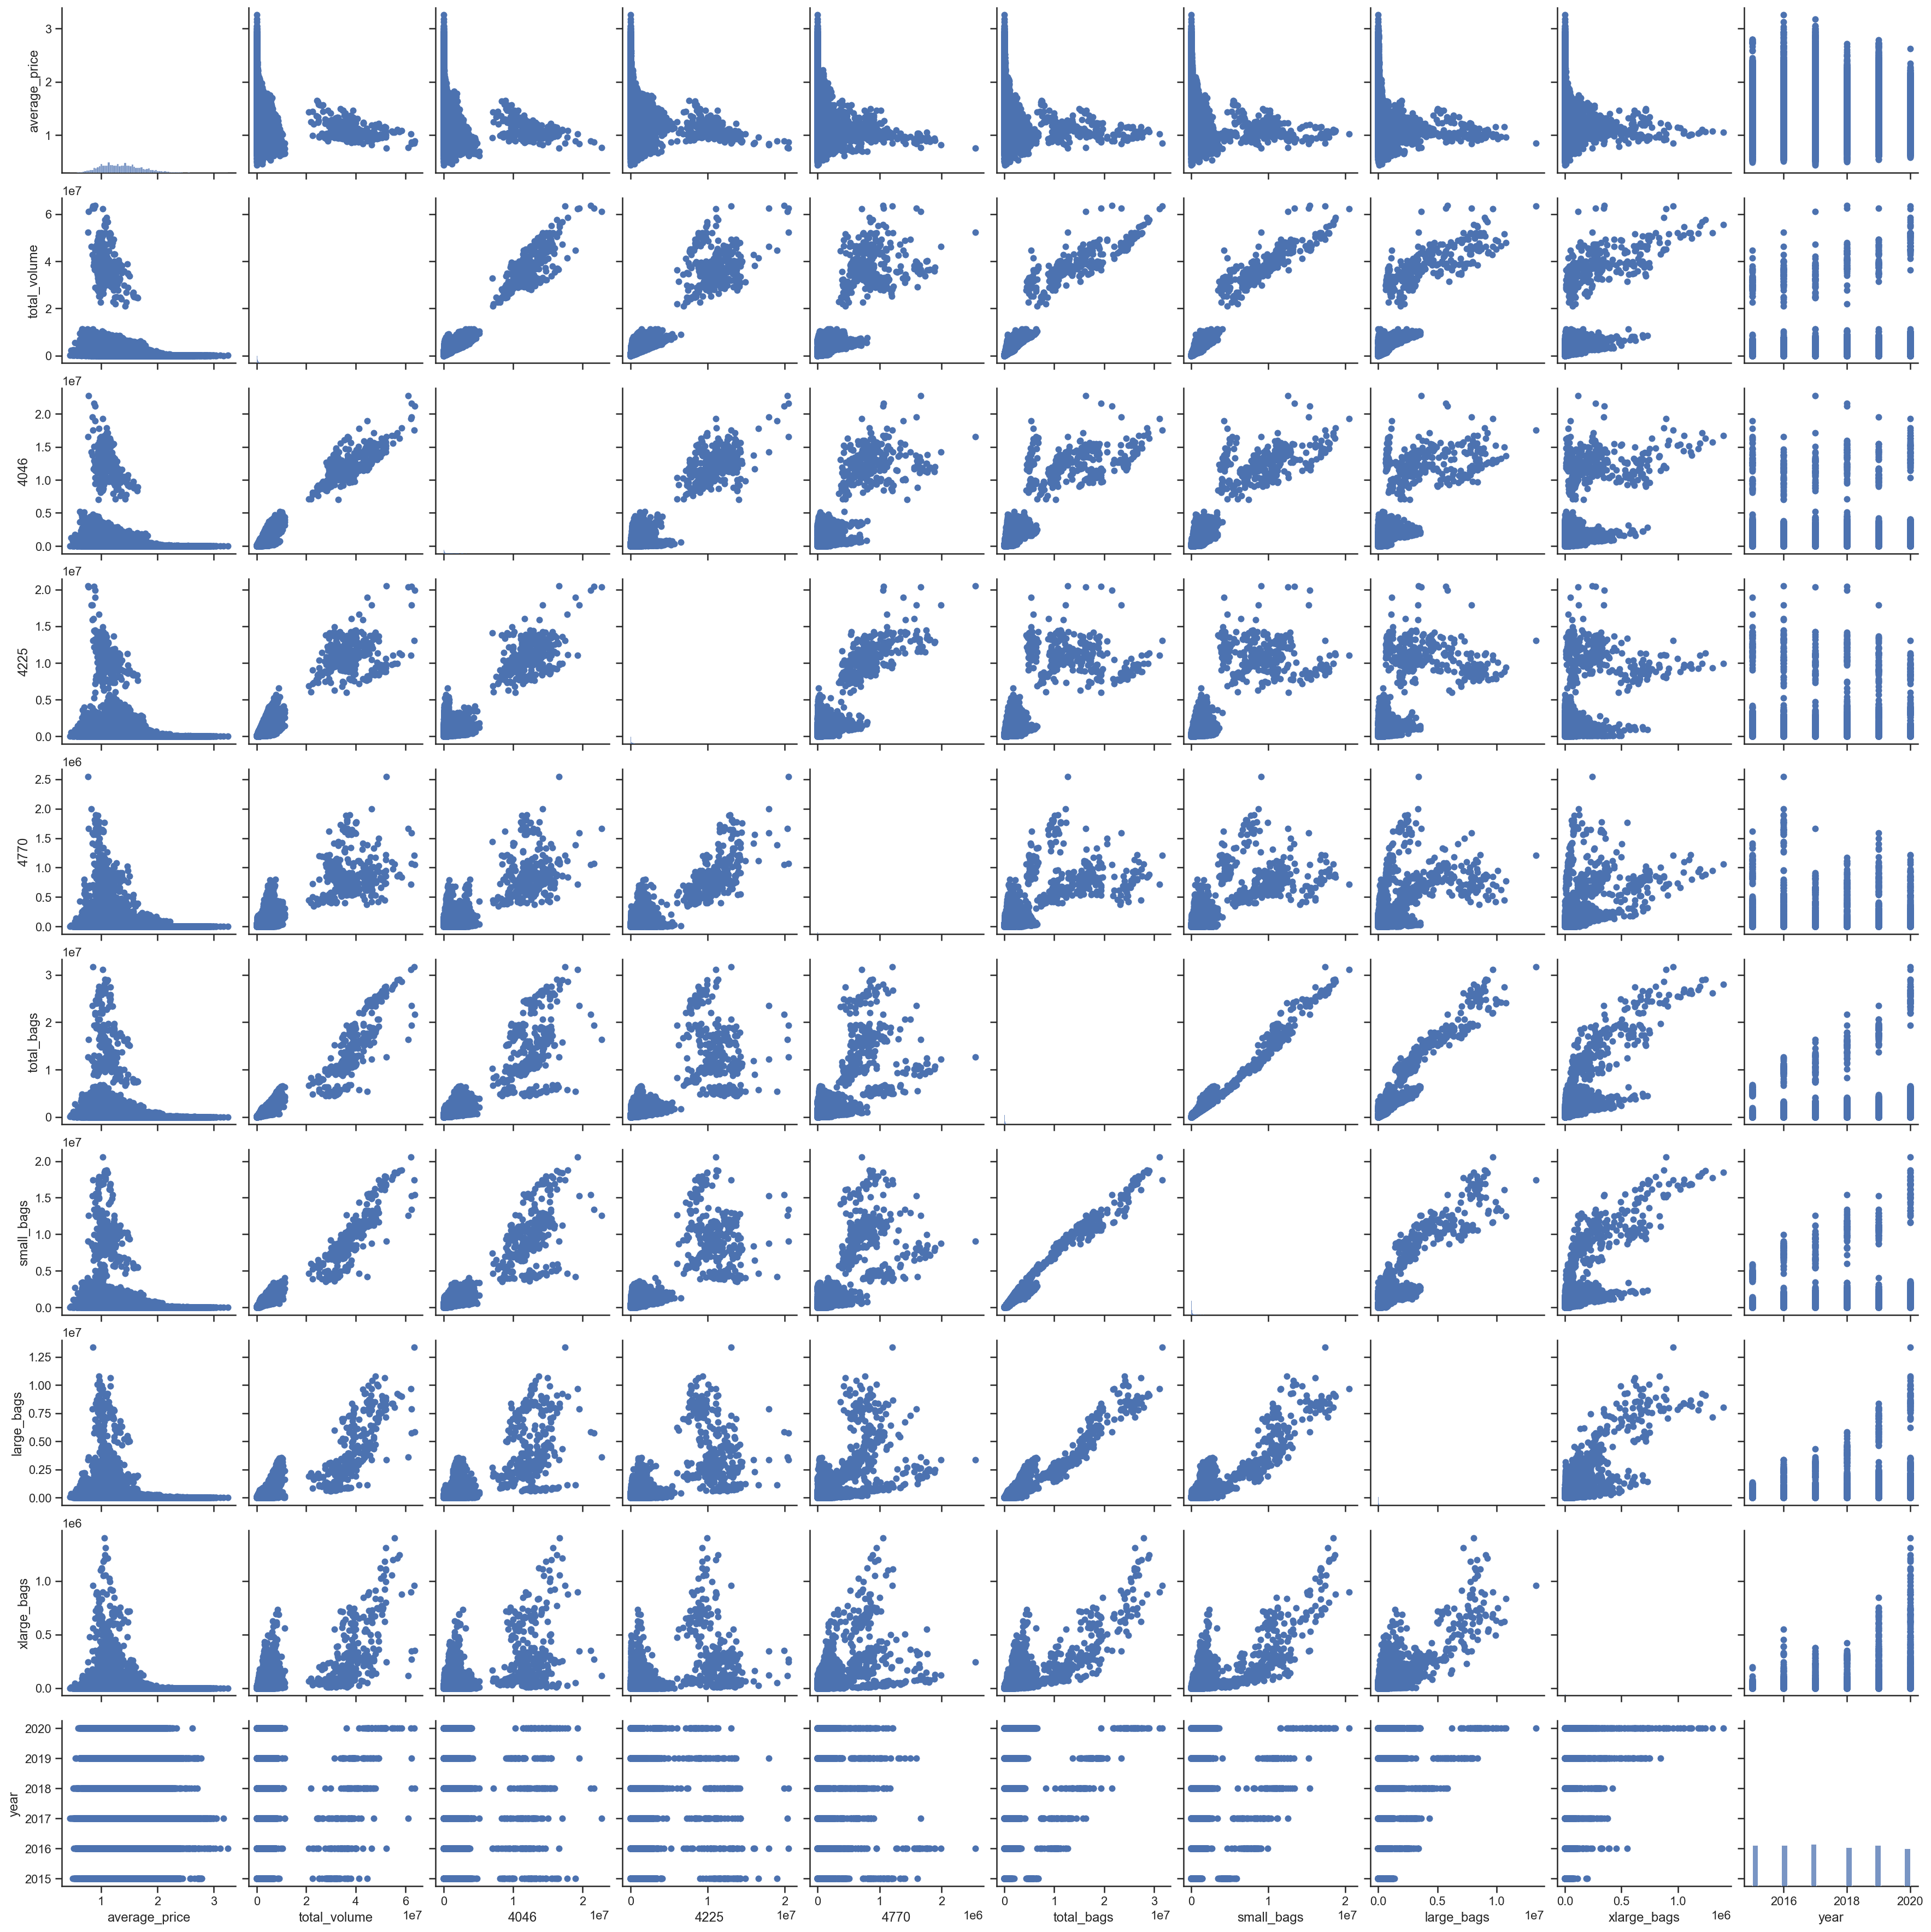

In [27]:
sns.pairplot(df, plot_kws=dict(linewidth=0));